In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
animeList = pd.read_csv("/kaggle/input/myanimelist/animelists_cleaned.csv")
animeList.head(50)

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
5,karthiga,210,161,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:57:06,NaN
6,karthiga,232,70,0000-00-00,0000-00-00,6,2,NaN,0,2013-03-09 17:24:42,NaN
7,karthiga,233,78,0000-00-00,0000-00-00,6,2,NaN,0,2013-03-10 05:29:44,NaN
8,karthiga,249,167,0000-00-00,0000-00-00,8,2,NaN,0,2013-03-19 16:04:46,NaN
9,karthiga,269,366,0000-00-00,0000-00-00,10,2,NaN,0,2013-03-03 09:39:23,NaN


In [3]:
animeList = animeList.drop(columns = ["my_start_date", "my_finish_date", "my_last_updated"])

In [4]:
#How many times an anime is watched 

result = animeList.groupby(['anime_id']).agg({
    'anime_id': 'count',  # Count of anime_id
    'my_score': 'mean'    # Mean of my_score
})

# Rename columns as per the SQL query
result.columns = ['num_times_anime_watched', 'mean_score_per_anime']

# Reset index to make anime_id a column again
result.reset_index(inplace=True)

In [5]:
num_times_anime = defaultdict(int)
for idx, row in result.iterrows():
    num_times_anime[str(int(row['anime_id']))] = row["num_times_anime_watched"]
    
num_times_anime =  defaultdict(int, sorted(num_times_anime.items(), key=lambda x: x[1], reverse=True)[:200])

200


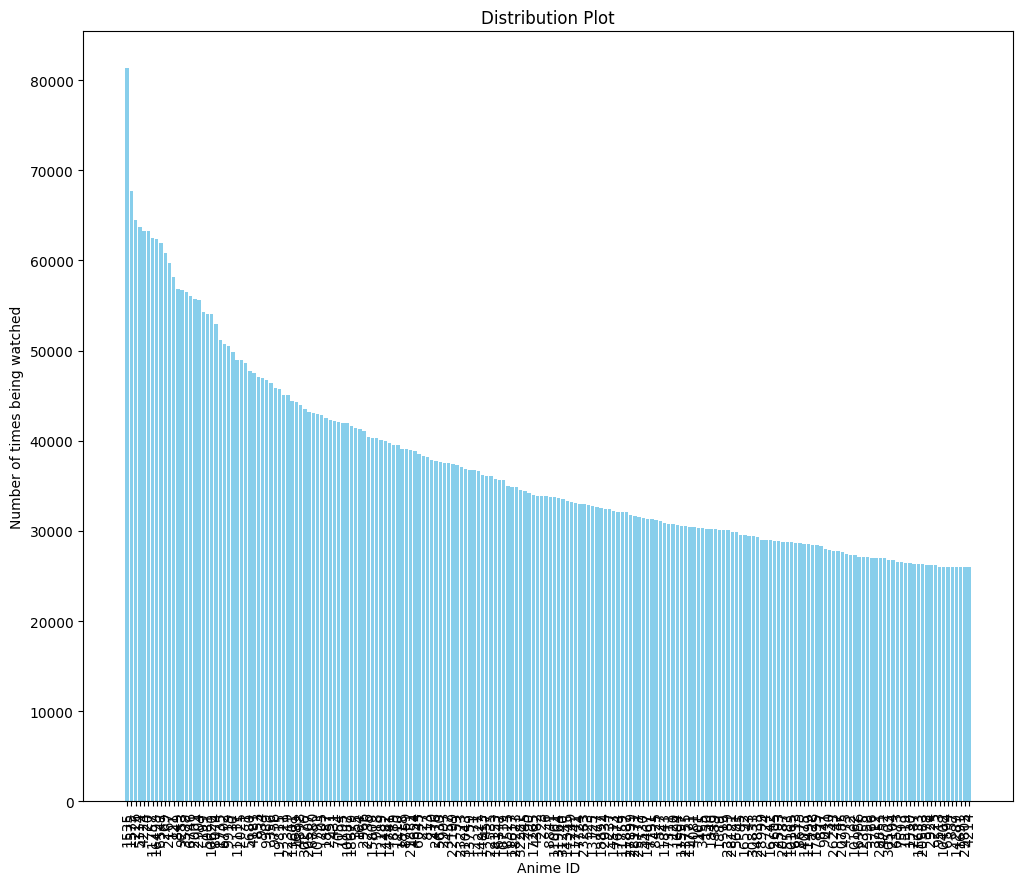

In [6]:
#Plot the distribution:
keys = list(num_times_anime.keys())
values = list(num_times_anime.values())
print(len(values))


plt.figure(figsize=(12, 10))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Anime ID')
plt.ylabel('Number of times being watched')
plt.title('Distribution Plot')
plt.xticks(rotation='vertical')  
# plt.tight_layout()
plt.show()

In [7]:
selected_anime_id = list(num_times_anime.keys())
selected_anime_id = [int(item) for item in selected_anime_id]

In [8]:
animeList_selected = animeList[animeList['anime_id'].isin(selected_anime_id)]
animeList_selected

,username,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,my_tags
0,karthiga,21,586,9,1,NaN,0,NaN
1,karthiga,59,26,7,2,NaN,0,NaN
3,karthiga,120,26,7,2,NaN,0,NaN
8,karthiga,249,167,8,2,NaN,0,NaN
9,karthiga,269,366,10,2,NaN,0,NaN
...,...,...,...,...,...,...,...,...
31283667,newsession,7791,26,10,2,0.0,0,NaN
31283669,Ryusai,5680,13,8,2,0.0,0,NaN
31283670,Ryusai,9041,12,8,2,0.0,0,NaN
31283671,Ryusai,6547,13,10,2,NaN,0,NaN


In [9]:
animeList_selected.to_csv("/kaggle/working/animeList_selected")

In [10]:
animeList = pd.read_csv("/kaggle/input/myanimelist/animelists_cleaned.csv")
animeList.head(50)

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
5,karthiga,210,161,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:57:06,NaN
6,karthiga,232,70,0000-00-00,0000-00-00,6,2,NaN,0,2013-03-09 17:24:42,NaN
7,karthiga,233,78,0000-00-00,0000-00-00,6,2,NaN,0,2013-03-10 05:29:44,NaN
8,karthiga,249,167,0000-00-00,0000-00-00,8,2,NaN,0,2013-03-19 16:04:46,NaN
9,karthiga,269,366,0000-00-00,0000-00-00,10,2,NaN,0,2013-03-03 09:39:23,NaN
